# ASSIGNMENT 3 - Team 8

## Headers

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split

## Assumptions

* According to the pre-processing problem statement, we have assumed that we have to first prune out the transactions with the movie ratings less than 2. Further to that, we have pruned out those transactions where the Users have rated less than 10 different movies
* In Part-3: We're using common sorted rules rather than all rules

## Data preprocessing

In [23]:
df = pd.read_csv("ml-latest-small/ratings.csv")

# rating of the movies should be greater than 2
df = df[df["rating"] > 2]

# keeping only those users with more than 10 movies rated
user_counts = df.groupby("userId")["movieId"].count()
valid_users = user_counts[user_counts > 10].index
df = df[df["userId"].isin(valid_users)]

# breaking the data into train and test (20% for testing for EACH user)
train_set = {}
test_set = {}

for user, group in df.groupby("userId"):
    train, test = train_test_split(group, test_size=0.2, random_state=42)
    train_set[user] = list(train["movieId"])
    test_set[user] = list(test["movieId"])

user_movies = df.groupby("userId")["movieId"].apply(list).to_dict()

In [24]:
# new data for Training
train_set

{1: [1136,
  1031,
  2054,
  2090,
  3450,
  1270,
  1408,
  1517,
  1967,
  661,
  441,
  2018,
  2944,
  3034,
  163,
  1197,
  543,
  349,
  1777,
  1127,
  1210,
  70,
  1032,
  1920,
  2141,
  2137,
  1097,
  2174,
  2991,
  4006,
  553,
  223,
  596,
  527,
  780,
  2058,
  1927,
  2450,
  1024,
  2899,
  2872,
  1220,
  736,
  1473,
  2143,
  1224,
  2478,
  480,
  3439,
  2987,
  2078,
  1,
  6,
  1222,
  940,
  1580,
  1793,
  2139,
  2571,
  1348,
  1275,
  2528,
  2406,
  1552,
  608,
  2105,
  1080,
  367,
  2366,
  2502,
  592,
  216,
  3740,
  2797,
  101,
  500,
  2161,
  3671,
  3702,
  2459,
  50,
  2046,
  590,
  2542,
  1089,
  2093,
  3527,
  2648,
  1198,
  2692,
  1092,
  919,
  2353,
  733,
  2048,
  423,
  2641,
  2596,
  1256,
  673,
  3729,
  943,
  1445,
  2654,
  804,
  2329,
  2470,
  47,
  1644,
  1029,
  2115,
  3273,
  2949,
  3448,
  1009,
  1240,
  593,
  110,
  1804,
  1377,
  1265,
  3168,
  3386,
  1298,
  151,
  231,
  1060,
  2997,
  2099,
  316,


## Functions Implemented

In [25]:
# Association rule mining functions
def support(movies):
    matching_users = [
        user for user in train_set if all(movie in train_set[user] for movie in movies)
    ]
    return len(matching_users) / len(train_set)


def generate_frequent_itemsets(k, minsup, prev_frequent_itemsets, all_movies_sup):
    if k == 1:
        return [([movie], sup) for movie, sup in all_movies_sup.items()]

    candidates = set()
    for i in range(len(prev_frequent_itemsets)):
        for j in range(i + 1, len(prev_frequent_itemsets)):
            itemset1 = set(prev_frequent_itemsets[i][0])
            itemset2 = set(prev_frequent_itemsets[j][0])
            new_itemset = itemset1.union(itemset2)
            if len(new_itemset) == k:
                candidates.add(tuple(sorted(new_itemset)))

    return [
        (list(itemset), support(itemset))
        for itemset in candidates
        if support(itemset) >= minsup
    ]


def generate_association_rules(frequent_itemsets, minconf):
    rules = []
    for itemset, sup in frequent_itemsets:
        if len(itemset) > 1:  # We need at least 2 items to form a rule
            for i in range(len(itemset)):
                antecedent = [itemset[i]]
                consequent = [item for j, item in enumerate(itemset) if j != i]
                conf = sup / support(antecedent)
                if conf >= minconf:
                    rules.append((antecedent, consequent, sup, conf))
    return rules

## Part 1

In [26]:
# setting our own parameters
minsup = 0.09
minconf = 0.1

# getting unique movies in the training set
movies_train_unique = set(
    movie for user_movies in train_set.values() for movie in user_movies
)

# calculating support for individual movies
all_movies_sup = {
    movie: support([movie])
    for movie in movies_train_unique
    if support([movie]) >= minsup
}

# generating frequent itemsets
frequent_itemsets = [generate_frequent_itemsets(1, minsup, [], all_movies_sup)]
k = 2
while True:
    frequent_k = generate_frequent_itemsets(
        k, minsup, frequent_itemsets[-1], all_movies_sup
    )
    if not frequent_k:
        break
    frequent_itemsets.append(frequent_k)
    k += 1

# now generating association rules
all_rules = []
for itemsets in frequent_itemsets[1:]:  # Start from 2-itemsets
    all_rules.extend(generate_association_rules(itemsets, minconf))

# filtering and keeping rules where X contains a single movie
final_rules = [rule for rule in all_rules if len(rule[0]) == 1]

# printing all associations found
sorted_rules = sorted(final_rules, key=lambda x: x[3], reverse=True)

print(f"Number of association rules found: {len(sorted_rules)}")

# Print all rules, sorted by confidence
for rule in sorted_rules:
    print(f"{rule[0]} -> {rule[1]} (Support: {rule[2]:.4f}, Confidence: {rule[3]:.4f})")

Number of association rules found: 1979
[6365] -> [2571] (Support: 0.0923, Confidence: 0.7887)
[153] -> [592] (Support: 0.1170, Confidence: 0.7802)
[1221] -> [858] (Support: 0.1219, Confidence: 0.7789)
[1527] -> [2571] (Support: 0.1120, Confidence: 0.7727)
[2628] -> [2571] (Support: 0.1005, Confidence: 0.7722)
[60069] -> [2571] (Support: 0.0939, Confidence: 0.7703)
[1240] -> [2571] (Support: 0.1252, Confidence: 0.7677)
[5445] -> [2571] (Support: 0.1054, Confidence: 0.7619)
[778] -> [296] (Support: 0.0972, Confidence: 0.7564)
[5952] -> [7153] (Support: 0.1713, Confidence: 0.7536)
[1732] -> [2571] (Support: 0.0939, Confidence: 0.7500)
[2115] -> [2571] (Support: 0.0939, Confidence: 0.7500)
[7438] -> [6874] (Support: 0.1071, Confidence: 0.7471)
[33794] -> [7153] (Support: 0.1054, Confidence: 0.7356)
[5418] -> [2571] (Support: 0.1071, Confidence: 0.7303)
[4993] -> [7153] (Support: 0.1779, Confidence: 0.7248)
[5952] -> [4993] (Support: 0.1647, Confidence: 0.7246)
[1089] -> [296] (Support: 0.

## Part 2

In [27]:
# Helper function to convert a rule to a fully hashable format
def rule_to_hashable(rule):
    return (tuple(rule[0]), tuple(rule[1]), rule[2], rule[3])

# Sorting rules by support (descending order)
top_100_support = sorted(final_rules, key=lambda x: x[2], reverse=True)[:100]

# Sorting rules by confidence (descending order)
top_100_confidence = sorted(final_rules, key=lambda x: x[3], reverse=True)[:100]

# Finding common rules in both sets
common_rules = set(rule_to_hashable(rule) for rule in top_100_support) & set(
    rule_to_hashable(rule) for rule in top_100_confidence
)

# Sorting common rules by confidence
common_rules_sorted = sorted(common_rules, key=lambda x: x[3], reverse=True)

# Printing results
print(f"\nNumber of common rules: {len(common_rules)}")
print("\nCommon rules sorted by confidence:")
for i, rule in enumerate(common_rules_sorted, 1):
    print(
        f"{i}) {rule[0]} -> {rule[1]} (Support: {rule[2]:.4f}, Confidence: {rule[3]:.4f})"
    )


Number of common rules: 15

Common rules sorted by confidence:
1) (5952,) -> (7153,) (Support: 0.1713, Confidence: 0.7536)
2) (4993,) -> (7153,) (Support: 0.1779, Confidence: 0.7248)
3) (5952,) -> (4993,) (Support: 0.1647, Confidence: 0.7246)
4) (1196,) -> (260,) (Support: 0.1928, Confidence: 0.7222)
5) (7153,) -> (4993,) (Support: 0.1779, Confidence: 0.7059)
6) (2762,) -> (2571,) (Support: 0.1565, Confidence: 0.6985)
7) (1210,) -> (260,) (Support: 0.1664, Confidence: 0.6966)
8) (2028,) -> (2571,) (Support: 0.1713, Confidence: 0.6842)
9) (7153,) -> (5952,) (Support: 0.1713, Confidence: 0.6797)
10) (4993,) -> (5952,) (Support: 0.1647, Confidence: 0.6711)
11) (1198,) -> (2571,) (Support: 0.1697, Confidence: 0.6603)
12) (47,) -> (296,) (Support: 0.1631, Confidence: 0.6600)
13) (1210,) -> (1196,) (Support: 0.1565, Confidence: 0.6552)
14) (1210,) -> (2571,) (Support: 0.1565, Confidence: 0.6552)
15) (1196,) -> (2571,) (Support: 0.1746, Confidence: 0.6543)


## Part 3

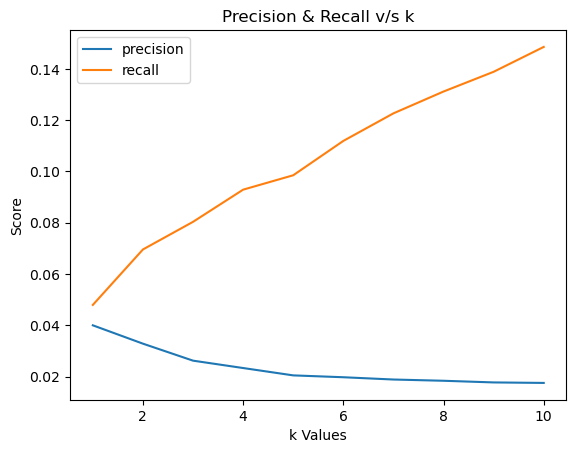

In [31]:
precision_avgs = []
recall_avgs = []

# iterating over the number of rules selected from the Top Rules
for k in range(1, 11):
    # iterating over each user in the test set
    all_precisions = []
    all_recalls = []
    for user in test_set.keys():
        # getting all movies rated by this user from the training set
        user_movies_from_train_set = train_set[user]

        # getting predictions set
        predictions = list()
        for movie in user_movies_from_train_set:
            rules_taken_count = 0
            temp_predictions = []

            # iterating over top k rules only
            for rule in sorted_rules:
                if rule[0][0] == movie:
                    temp_predictions += rule[1]
                    rules_taken_count += 1

                    # checking if top k done
                    if rules_taken_count == k:
                        break

            # adding temp predictions to the main predictions
            predictions += temp_predictions

        # calculating recall
        user_recall = len(set(test_set[user]) & set(predictions)) / len(test_set[user])
        all_recalls.append(user_recall)

        # calculating precision
        user_precision = 0
        if len(predictions) != 0:
            user_precision = len(set(test_set[user]) & set(predictions)) / len(
                predictions
            )
        all_precisions.append(user_precision)

    # calculating average precision and recall
    precision_avg_for_k = np.mean(all_precisions)
    recall_avg_for_k = np.mean(all_recalls)

    # adding to the list
    precision_avgs.append(precision_avg_for_k)
    recall_avgs.append(recall_avg_for_k)

# plotting graph
x = [i for i in range(1, 11)]
plt.plot(x, precision_avgs, label="precision")
plt.plot(x, recall_avgs, label="recall")
plt.legend()
plt.xlabel("k Values")
plt.ylabel("Score")
plt.title("Precision & Recall v/s k")
plt.show()

## Reasoning & Inference

__Decreasing Precision :__\
As the number of rules (k) increases, the average precision is likely to decrease. This occurs because a larger set of rules leads to more recommendations, some of which may not be relevant to the user. Consequently, precision, which measures the proportion of relevant items among the recommended ones, tends to decline as k increases.

__Increasing Recall :__\
Conversely, as the number of rules (k) increases, the average recall is likely to improve. This is because a larger set of rules results in more recommendations, increasing the likelihood of including relevant items from the test set. Recall measures the proportion of relevant items that are successfully recommended, and as the number of recommendations grows, so does the chance of covering a greater portion of the relevant items.

__Trade-off Between Precision & Recall :__\
The relationship between precision and recall typically exhibits a trade-off. When fewer rules are used (lower k), you tend to achieve higher precision but lower recall. Conversely, when more rules are applied (higher k), you generally obtain higher recall but lower precision. This trade-off is often visualized in a graph showing the inverse relationship between these two metrics as the number of rules changes.

## Part 4

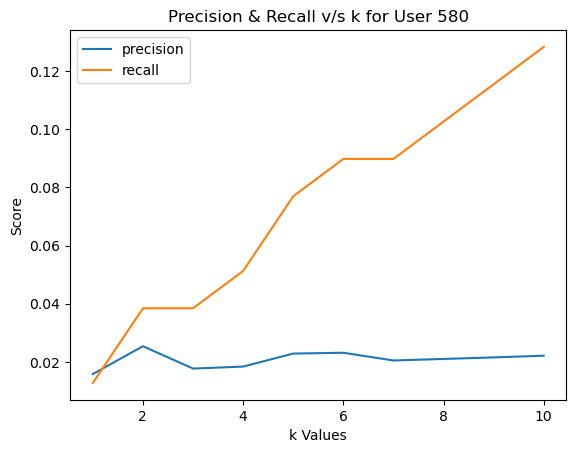

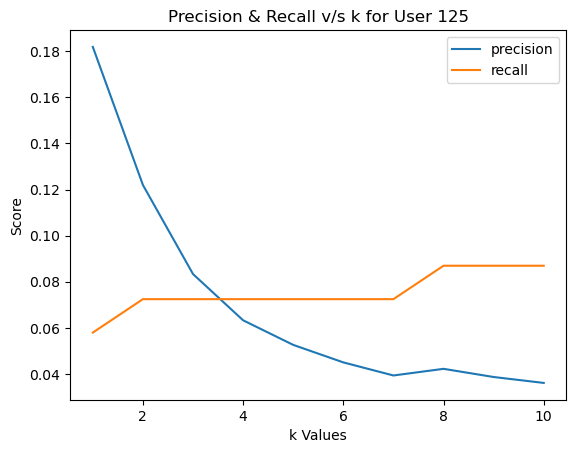

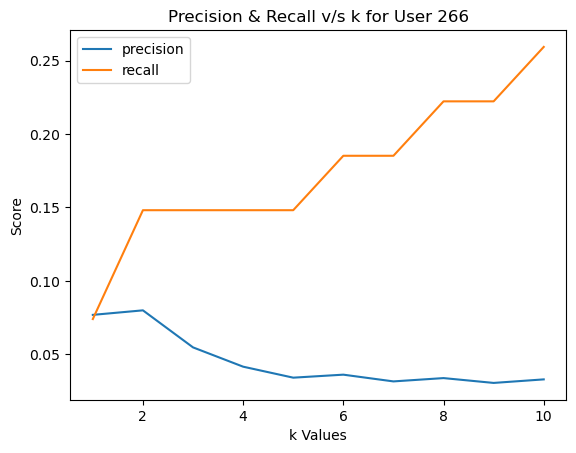

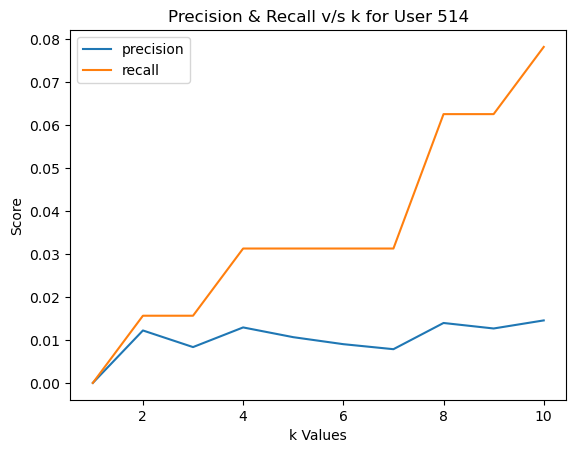

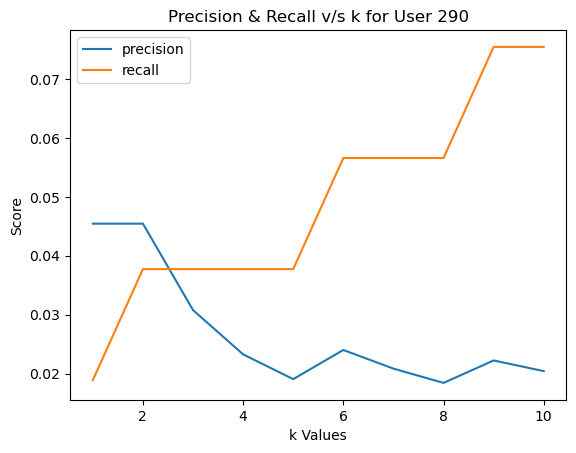

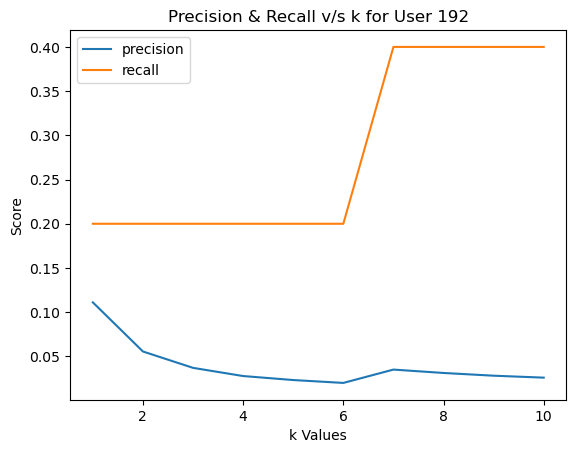

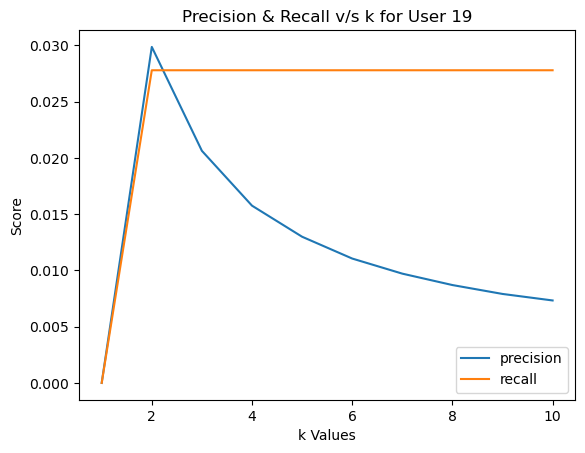

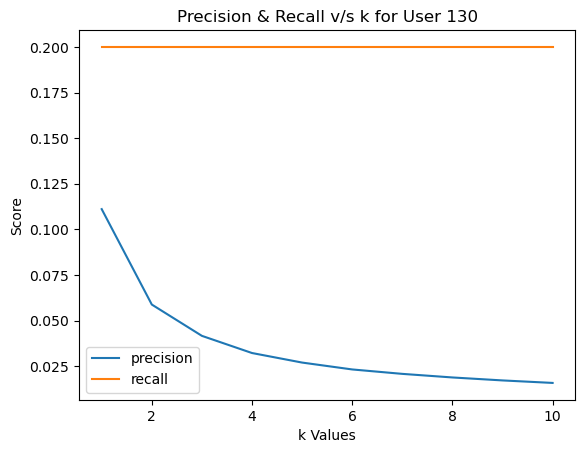

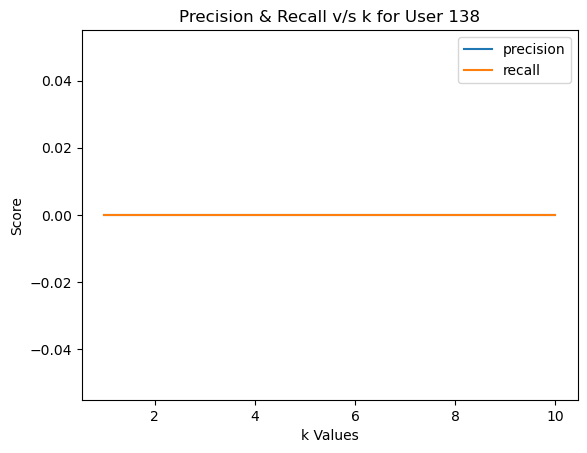

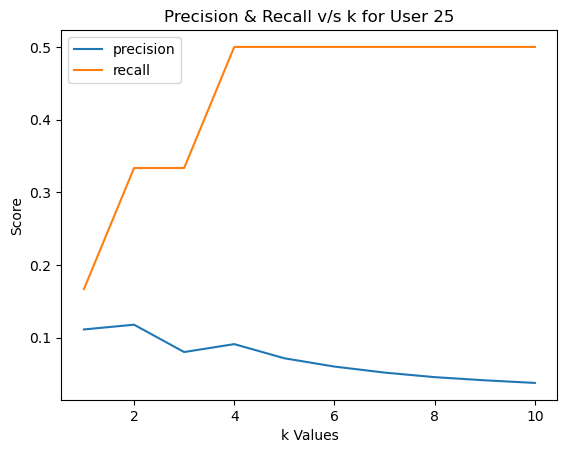

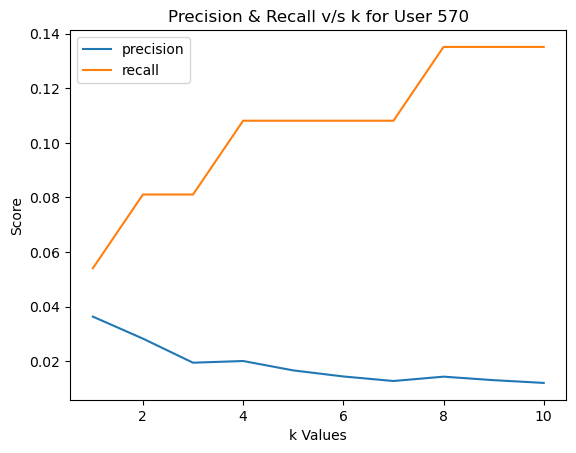

In [34]:
# doing the same as above but for EACH user rather than averaging out for all users
# for that, sampling some random 11 users

# getting list of random 11 users
random_users = random.sample(list(test_set.keys()), 11)

# iterating over each user
for user in random_users:
    all_recalls = []
    all_precisions = []

    # iterating over k values
    for k in range(1, 11):
        # getting all movies rated by this user from the training set
        user_movies_from_train_set = train_set[user]

        # getting predictions set
        predictions = list()
        for movie in user_movies_from_train_set:
            rules_taken_count = 0
            temp_predictions = []

            # iterating over top k rules only
            for rule in sorted_rules:
                if rule[0][0] == movie:
                    temp_predictions += rule[1]
                    rules_taken_count += 1

                    # checking if top k done
                    if rules_taken_count == k:
                        break

            # adding temp predictions to the main predictions
            predictions += temp_predictions

        # calculating recall
        user_recall = len(set(test_set[user]) & set(predictions)) / len(test_set[user])
        all_recalls.append(user_recall)

        # calculating precision
        user_precision = 0
        if len(predictions) != 0:
            user_precision = len(set(test_set[user]) & set(predictions)) / len(
                predictions
            )
        all_precisions.append(user_precision)

    # plotting graph for THIS user
    x = [i for i in range(1, 11)]
    plt.plot(x, all_precisions, label="precision")
    plt.plot(x, all_recalls, label="recall")
    plt.legend()
    plt.xlabel("k Values")
    plt.ylabel("Score")
    plt.title(f"Precision & Recall v/s k for User {user}")
    plt.show()